In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Plasticity_Rule_test'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,20,2   # frequency in Hz
                                              ],20000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(5.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current coupled = <PC_Coupled_STDP.I_intrinsic: array([2.  , 1.96, 2.04, 1.94, 2.08, 2.06, 1.92, 2.02, 1.9 , 1.98]) * namp>
intrinsic current uncoupled = <PC_Uncoupled_STDP.I_intrinsic: array([2.  , 1.96, 2.04, 1.94, 2.08, 2.06, 1.92, 2.02, 1.9 , 1.98]) * namp>
number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.]


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


<dummy_Coupled.weight: array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 1. , 0.9,
       0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])>
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] freq [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.]


In [5]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 5. s
112.325 ms (2%) simulated in 10s, estimated 7m 15s remaining.
237.575 ms (4%) simulated in 20s, estimated 6m 41s remaining.
0.361475 s (7%) simulated in 30s, estimated 6m 25s remaining.
0.512025 s (10%) simulated in 40s, estimated 5m 51s remaining.
0.657025 s (13%) simulated in 50s, estimated 5m 31s remaining.
0.795375 s (15%) simulated in 1m 0s, estimated 5m 17s remaining.
0.937025 s (18%) simulated in 1m 10s, estimated 5m 4s remaining.
1.034025 s (20%) simulated in 1m 20s, estimated 5m 7s remaining.
1.095025 s (21%) simulated in 1m 30s, estimated 5m 21s remaining.
1.157025 s (23%) simulated in 1m 40s, estimated 5m 33s remaining.
1.214875 s (24%) simulated in 1m 50s, estimated 5m 43s remaining.
1.267025 s (25%) simulated in 2m 0s, estimated 5m 54s remaining.
1.316025 s (26%) simulated in 2m 10s, estimated 6m 5s remaining.
1.362025 s (27%) simulated in 2m 20s, estimated 6m 15s remaining.
1.417025 s (28%) simulated in 2m 30s, estimate

In [6]:
#run(exp_runtime,report='text')

['frequency =20', 'frequency =2']


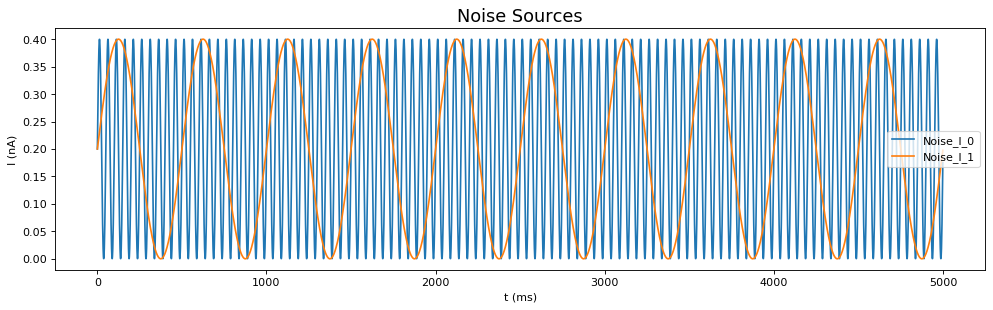

Plasticity


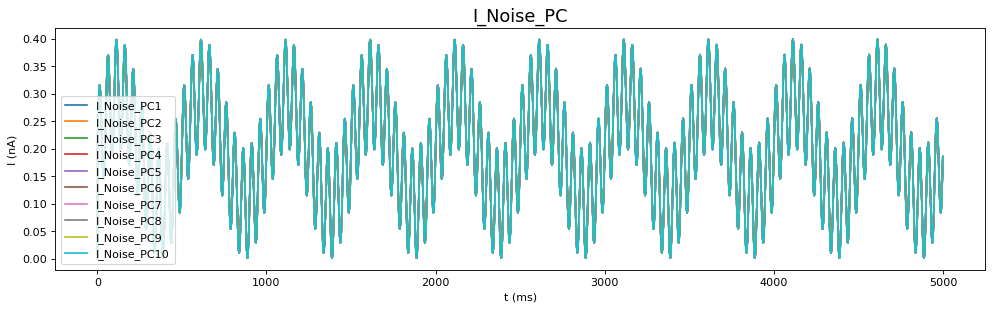

Plasticity Coupled Scenario


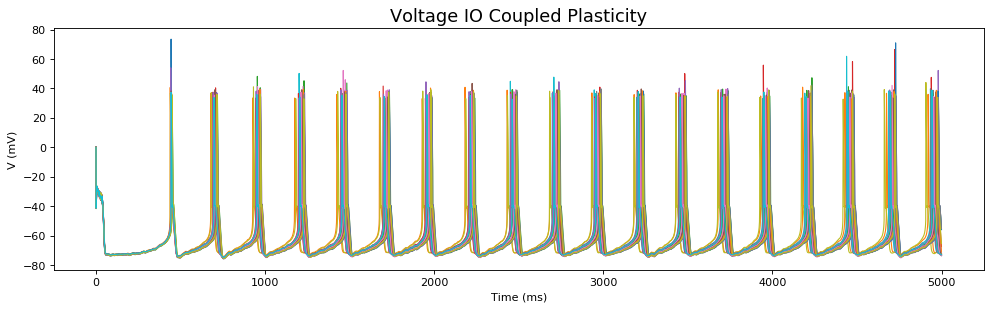

Number of spikes DCN: 169
Number of spikes DCN: 218
Number of spikes DCN: 197
Number of spikes DCN: 196
Number of spikes DCN: 179
Number of spikes DCN: 199
Number of spikes DCN: 217
Number of spikes DCN: 219
Number of spikes DCN: 165
Number of spikes DCN: 194


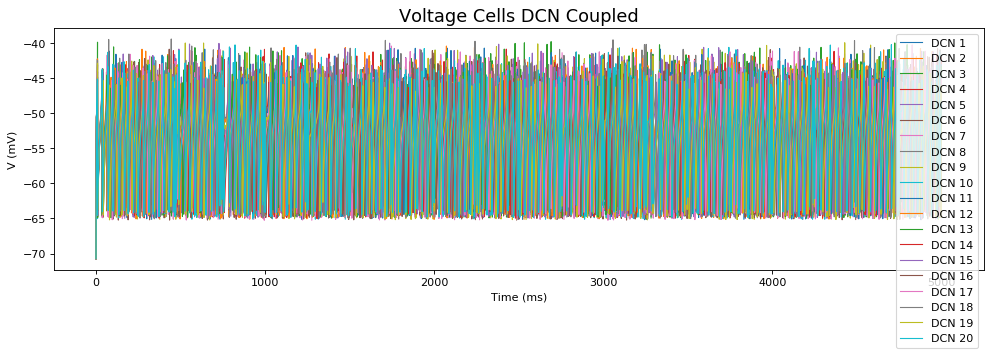

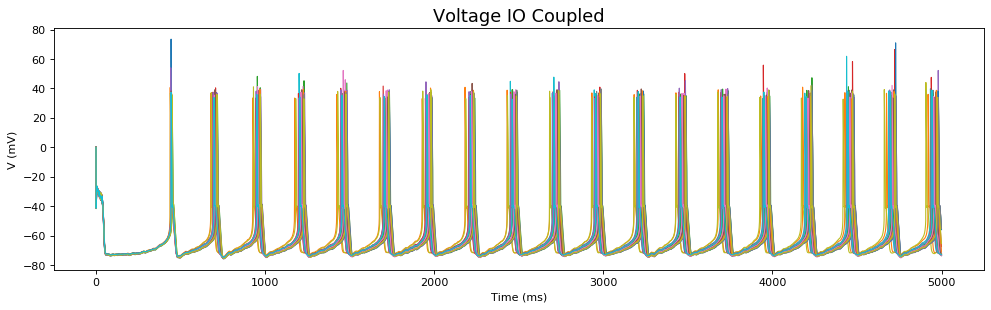

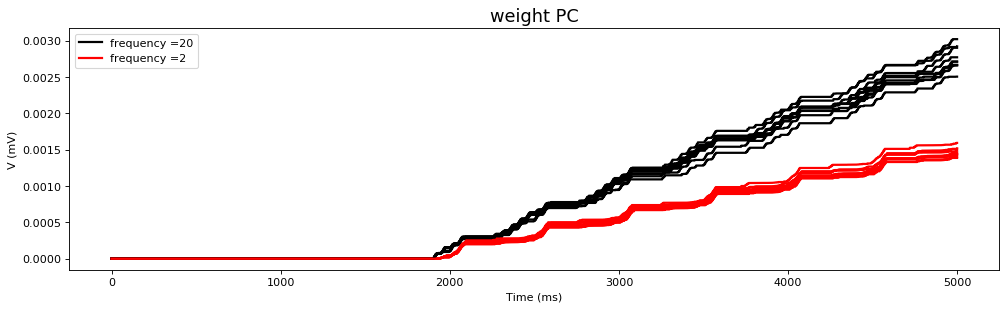

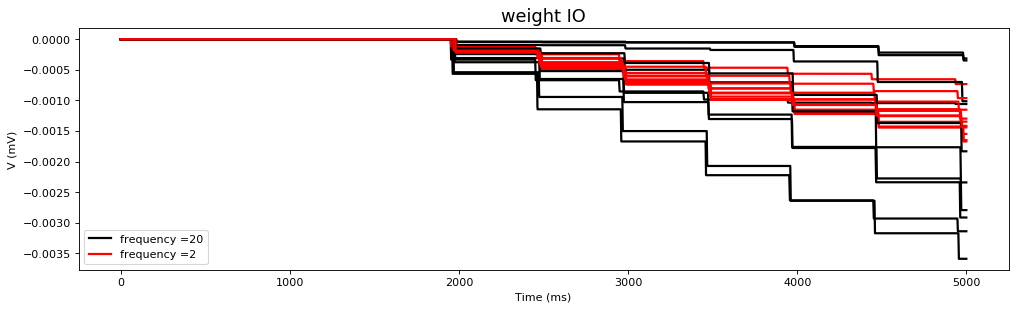

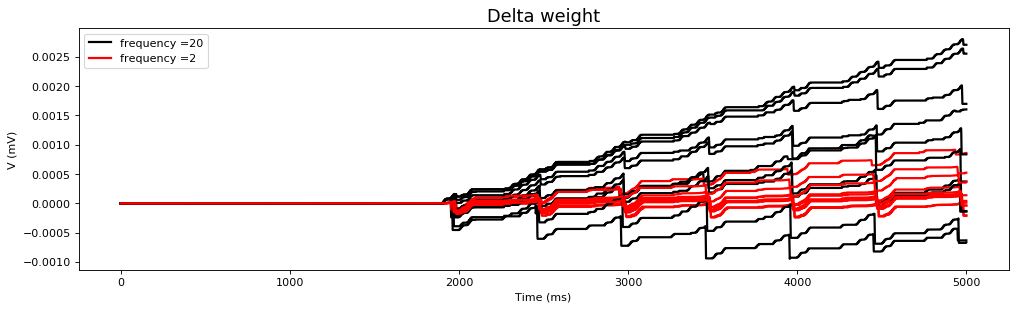

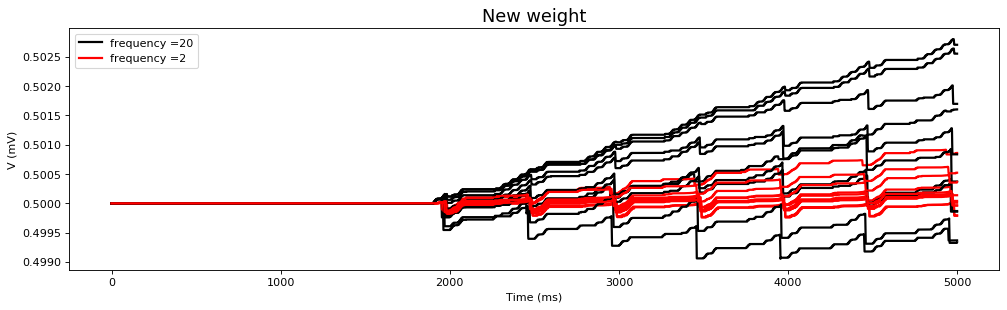

Plasticity Uncoupled Scenario


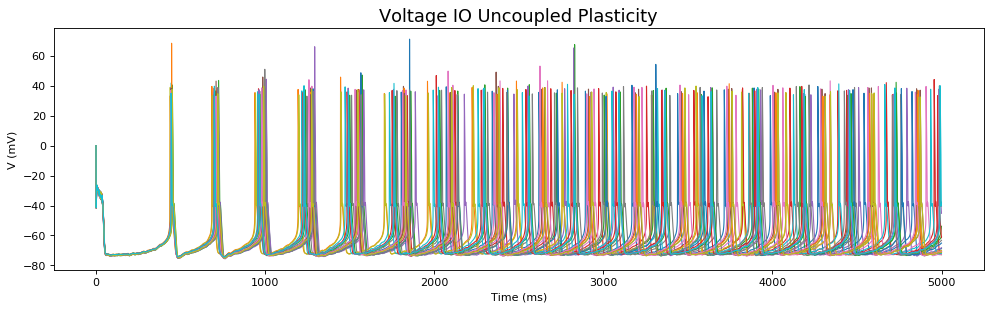

Number of spikes DCN: 161
Number of spikes DCN: 208
Number of spikes DCN: 178
Number of spikes DCN: 176
Number of spikes DCN: 168
Number of spikes DCN: 175
Number of spikes DCN: 194
Number of spikes DCN: 192
Number of spikes DCN: 155
Number of spikes DCN: 180


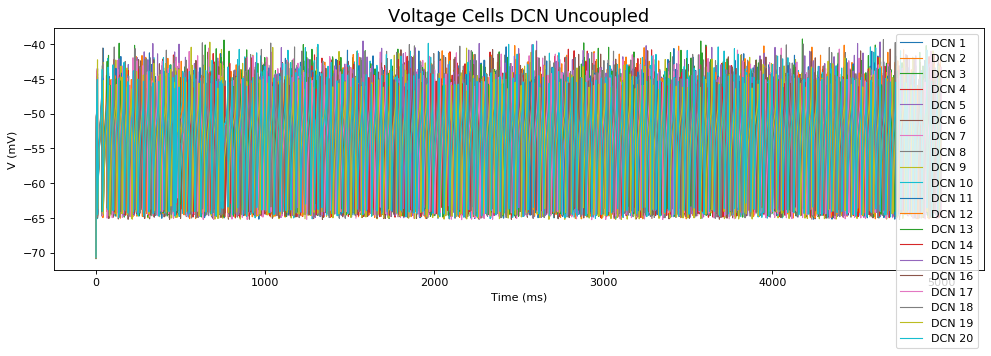

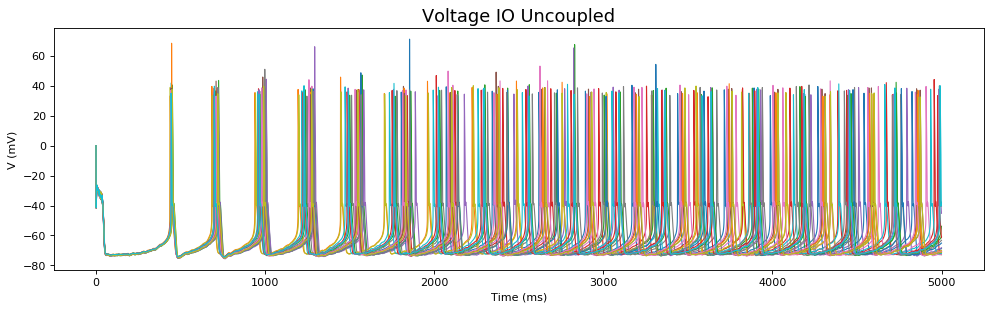

<Figure size 1200x320 with 0 Axes>

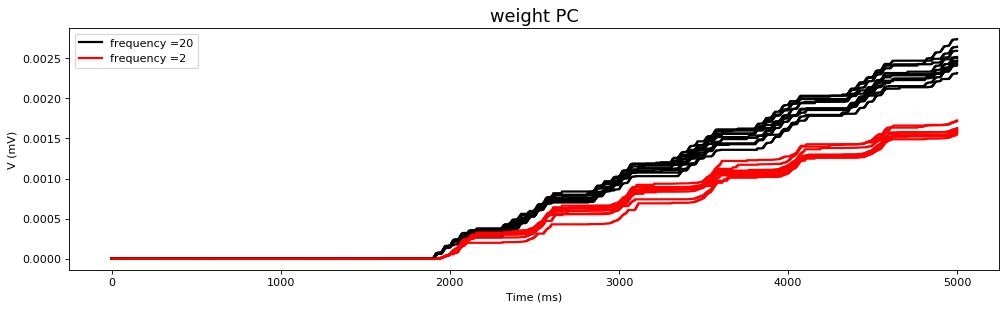

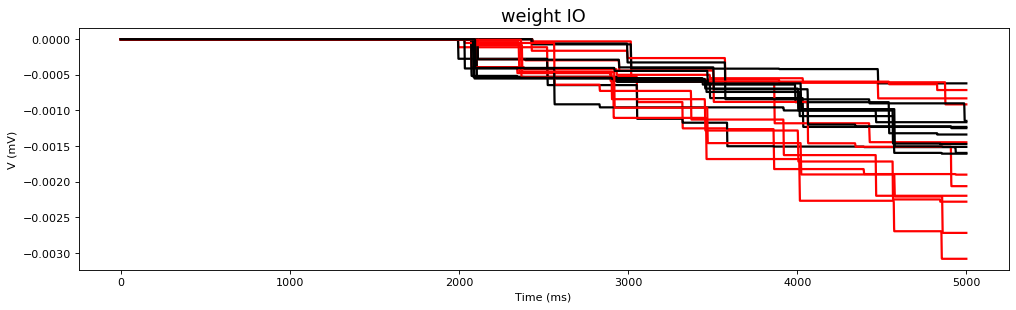

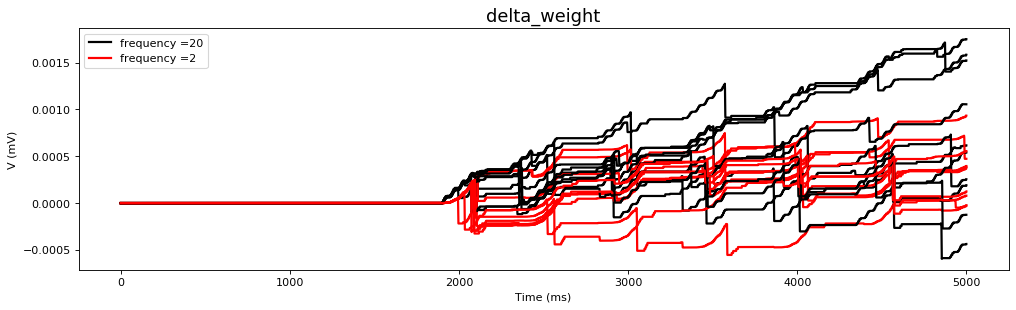

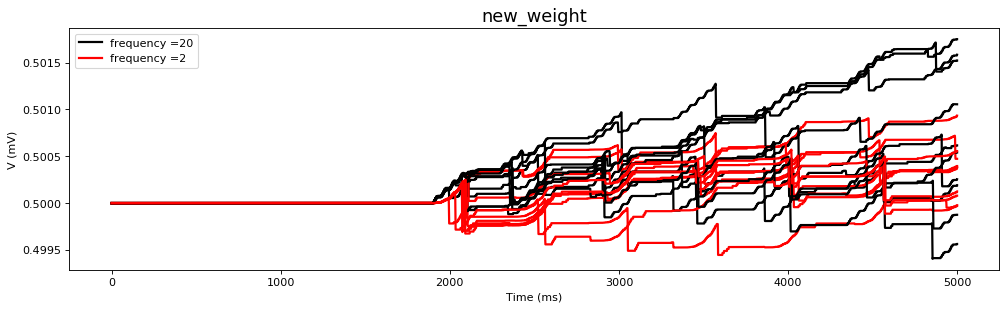

In [7]:
from G_Plot_Plasticity import *

In [8]:
#from F_save_data_Plasticity import *

In [9]:
from G_Plot_Plasticity import *

In [10]:
#from G_Plot_Plasticity import *

In [11]:
#print(mon_N_PC_Coupled.max_LTD_IO_uncoupled[1])
plt.figure()
for k in range(0,20):
    plt.plot(mon_N_PC_Coupled.freq_st_IO_coupled[k])
plt.show()

AttributeError: No attribute with name freq_st_IO_coupled

<Figure size 432x288 with 0 Axes>

[0. 0. 0. ... 1. 1. 1.]


<IPython.core.display.Javascript object>


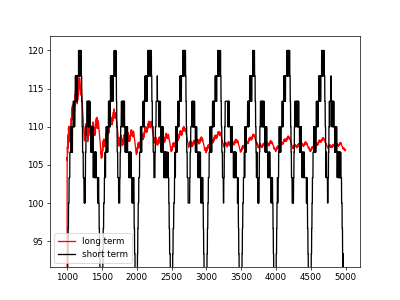

<IPython.core.display.Javascript object>


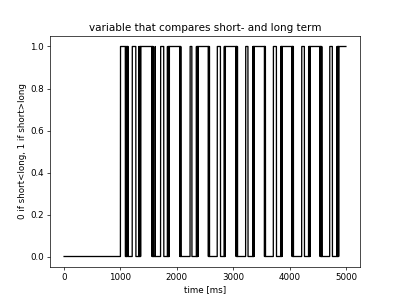

0.428


In [12]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(4000))
print(y_post)

plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,1):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
plt.legend(['long term', 'short term'])
plt.figure()
plt.title('variable that compares short- and long term')
for k in range(0,1):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    
    y= y_post*(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k]/((y_post-1)+mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k]))
    yw= y_post*(mon_N_PC_Coupled.f_lt_PC_coupled[k]/((y_post-1)+mon_N_PC_Coupled.f_st_PC_coupled[k]))

    y = np.floor(y)
    yw = np.floor(yw)
    #plt.plot(y,color='blue',linestyle='-')
    plt.plot(yw,color='black',linestyle='-')
plt.xlabel('time [ms]')
plt.ylabel('0 if short<long, 1 if short>long')
plt.show()
print(sum(yw)/len(y_post))



In [ ]:
from F_save_data_Plasticity import *

In [ ]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

In [ ]:
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()